## 1 - Import Data

In [23]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt

dataset = pd.read_csv("D:/Download (chrome)/mushroom_cleaned.csv/mushroom_cleaned new.csv")

dataset.shape

(6795, 9)

In [24]:
dataset.isnull().sum()
# we can see that there is no null or missing value

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

In [25]:
dataset.head(10)
#  first 10 rows of the dataset

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
5,1337,6,2,10,3.775635,1520,11,0.943195,1
6,1300,2,2,10,3.835320,1563,11,1.804273,1
7,1354,6,2,10,3.676160,1532,11,0.888450,1
8,1222,6,2,10,3.771656,1476,11,0.943195,1
9,1085,6,2,10,3.775635,1581,11,0.888450,1


In [26]:
dataset.info()
# to know type of data and some more information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6795 entries, 0 to 6794
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     6795 non-null   int64  
 1   cap-shape        6795 non-null   int64  
 2   gill-attachment  6795 non-null   int64  
 3   gill-color       6795 non-null   int64  
 4   stem-height      6795 non-null   float64
 5   stem-width       6795 non-null   int64  
 6   stem-color       6795 non-null   int64  
 7   season           6795 non-null   float64
 8   class            6795 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 477.9 KB


In [27]:
dataset.describe()
# to display some statical information like mean,min,max,etc.

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,6795.000000,6795.000000,6795.000000,6795.000000,6795.000000,6795.000000,6795.000000,6795.000000,6795.000000
mean,680.224283,4.005592,1.863723,8.842384,0.993921,1155.938926,9.731273,1.022798,0.428550
std,378.509316,2.116555,1.760030,2.475794,0.844386,620.840482,2.533476,0.286436,0.494905
min,69.000000,0.000000,0.000000,0.000000,0.000426,148.000000,0.000000,0.888450,0.000000
25%,380.000000,2.000000,1.000000,9.000000,0.267018,637.500000,10.000000,0.888450,0.000000
50%,612.000000,5.000000,2.000000,10.000000,0.711813,1176.000000,11.000000,0.943195,0.000000
75%,889.000000,6.000000,2.000000,10.000000,1.716508,1617.000000,11.000000,0.943195,1.000000
max,1866.000000,6.000000,6.000000,11.000000,3.835320,2942.000000,12.000000,1.804273,1.000000


## 2 - Exploratory data analysis (EDA)

In [28]:
dataset = dataset.sample(n=6_000)        # randomly selecting 6,000 rows from the dataset
dataset_color_map = {1: "red", 0: "blue"}
dataset_colors = dataset["class"].map(dataset_color_map)       # helpful to visualize the data points

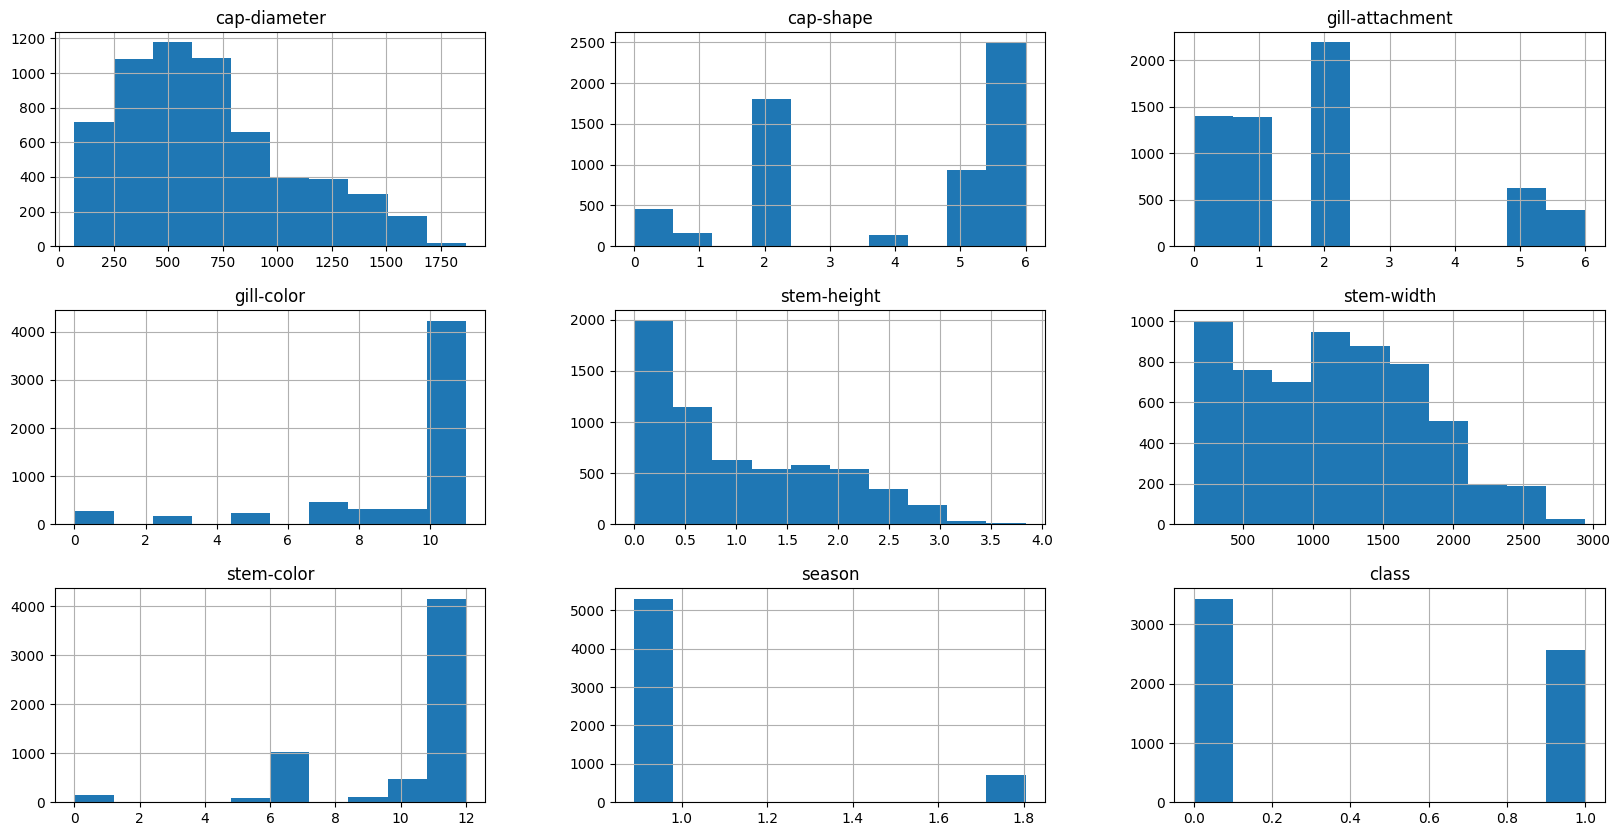

In [29]:
dataset.hist(figsize=(20,10));

<Axes: xlabel='cap-diameter', ylabel='stem-height'>

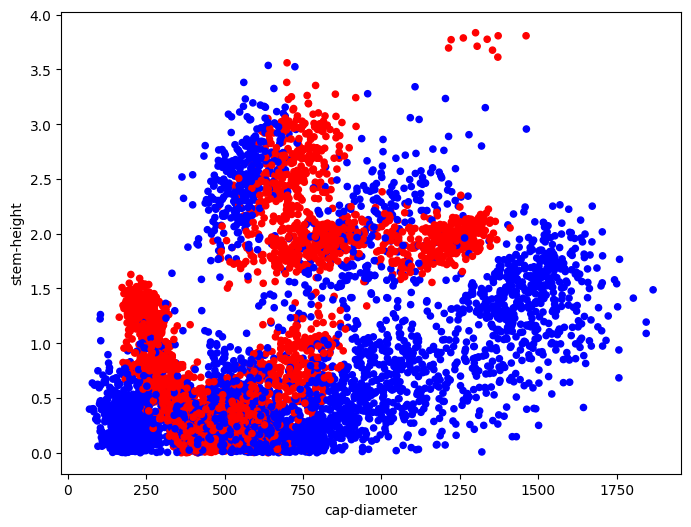

In [30]:
dataset.plot.scatter("cap-diameter", "stem-height", 
                     c=dataset_colors, 
                     figsize=(8, 6))             # to creates a scatter plot between cap-diameter and stem-height

<Axes: xlabel='stem-width', ylabel='stem-height'>

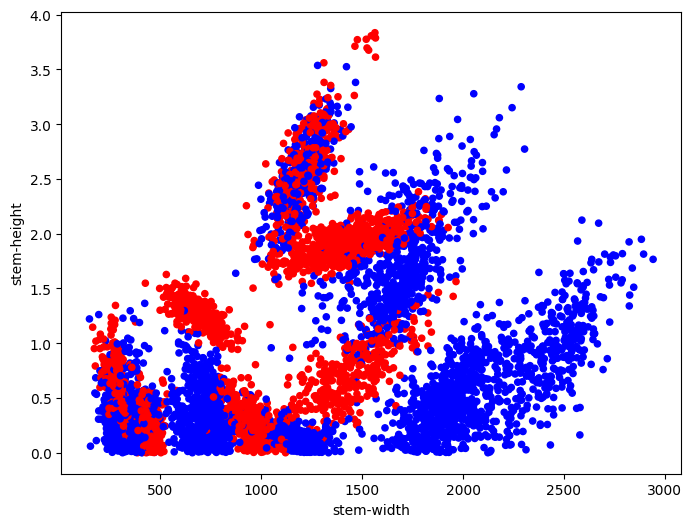

In [31]:
dataset.plot.scatter("stem-width", "stem-height", 
                     c=dataset_colors,
                     figsize=(8, 6))          # to creates a scatter plot between stem-width and stem-height

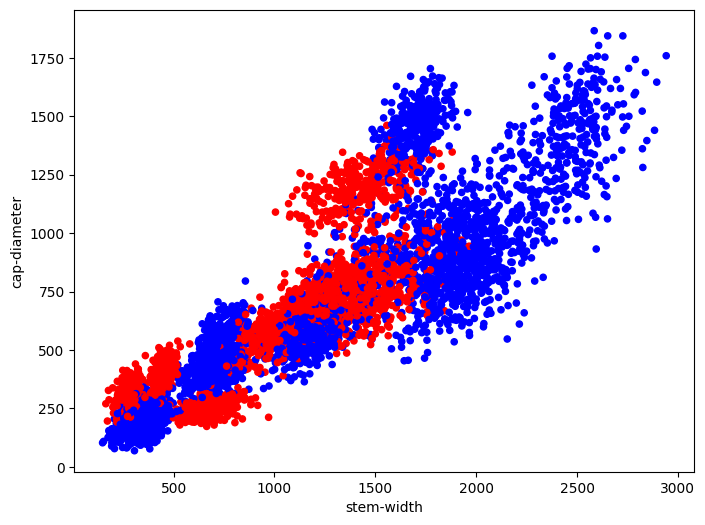

In [32]:
dataset.plot.scatter("stem-width", "cap-diameter", 
                     c=dataset_colors, 
                     figsize=(8, 6));             # to creates a scatter plot between stem-width and cap-diameter

## 3 - Data Preprocessing

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = pd.DataFrame(dataset["class"])
X = dataset.drop(["class"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
# preprocessing data where 70% of data will be used for training the model and 30% for evaluating the model

## 4 - Models

### 4.1 - KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier

KNNClassifierModel = KNeighborsClassifier(n_neighbors= 10,          # each prediction will be based on the 10 nearest neighbors
                                          weights ='uniform',
                                          algorithm='auto')

KNNClassifierModel.fit(X_train, y_train.values.ravel())        # trains the KNN model on X_train as features and y_train as target

print('KNNClassifierModel Train Score is : ',
      KNNClassifierModel.score(X_train, y_train))           # to computes the accuracy of the model
print('KNNClassifierModel Test Score is : ',
      KNNClassifierModel.score(X_test, y_test))

KNNClassifierModel Train Score is :  0.8926190476190476
KNNClassifierModel Test Score is :  0.8733333333333333


In [35]:
from sklearn import metrics

prediction=KNNClassifierModel.predict(X_test)
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))          # giving some of the features of the dataset in matrix form

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1028
           1       0.86      0.85      0.85       772

    accuracy                           0.87      1800
   macro avg       0.87      0.87      0.87      1800
weighted avg       0.87      0.87      0.87      1800

[[917 111]
 [117 655]]


In [36]:
print("Accuracy:", metrics.accuracy_score(y_test, prediction))      # it prints the accuracy of the model on the test data

Accuracy: 0.8733333333333333


In [37]:
from sklearn.svm import SVC
from sklearn import metrics

SVMModel = SVC(kernel='linear')              

SVMModel.fit(X_train, y_train.values.ravel())        # Train the SVM model

print('SVMModel Train Score is : ', SVMModel.score(X_train, y_train))       # Evaluate and print the training and test scores
print('SVMModel Test Score is : ', SVMModel.score(X_test, y_test))

svm_predictions = SVMModel.predict(X_test)

print("Classification Report:\n", metrics.classification_report(y_test, svm_predictions))          # giving some of the features of the dataset in matrix form
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, svm_predictions))
print("Accuracy:", metrics.accuracy_score(y_test, svm_predictions))           


SVMModel Train Score is :  0.7457142857142857
SVMModel Test Score is :  0.7544444444444445
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.87      0.80      1028
           1       0.77      0.61      0.68       772

    accuracy                           0.75      1800
   macro avg       0.76      0.74      0.74      1800
weighted avg       0.76      0.75      0.75      1800

Confusion Matrix:
 [[890 138]
 [304 468]]
Accuracy: 0.7544444444444445
